<a href="https://colab.research.google.com/github/IvanMGro/montecarlo/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Cuál es la probabilidad de que dos personas cumplan el mismo día en un grupo de ```n``` personas?

In [ ]:
import numpy as np

def montecarlo(n_personas,iterations):

    results = []
   
    for i in range(iterations):

        #Cada elemento es una persona y su valor corresponde al dia que cumple años
        bthday_list = [] 
        
        #Para cada n persona asignamos un num aleatorio por persona (1,365)
        for n in range(n_personas):
            n_birth = np.random.randint(1,365)
            bthday_list.append(n_birth)

        #Obtenemos una lista sin repeticiones de cumpleaños
        unique_list = list(set(bthday_list))      

        #Cuando esta condicion se cumple implica que 2 personas o más coinciden
        #Ejemplo: len[2,65,349,65] - len[2,65,349] =  1. Se cumple
        if (len(bthday_list)-len(unique_list))>0: 
            true_match = 1
        else:
            true_match = 0
        results.append(true_match)
    
    #probabilidad = cantidad_matches / num_iteraciones
    pb = sum(results) / len(results)
    
    return pb

¿Cuál es la probabilidad de que 2 personas cumplan el 
mismo día en un grupo de 50 personas?

In [ ]:
pb = montecarlo(50,10000)
print("La probabilidad es del:", pb*100, "%")

La probabilidad es del: 97.2 %


Realizamos este experimento y graficamos sus resultados obteniendo la probabilidad ```pb``` en cada caso de ```n``` personas

Text(0, 0.5, 'Prob %')

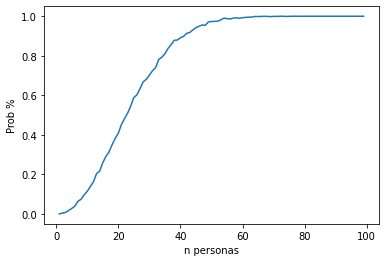

In [ ]:
fy = []
fx = []

#Vamos a correr 1000 veces el mismo experimento para 100 escenarios.
#En cada escenario n+1 aumenta el numero de personas en el experimento

for n in range(100)[1:]:
    #Entre mayor es el número de iteraciones mayor es la precisión del gráfico
    proby = montecarlo(n,2000) 
    probx = n                  
    fy.append(proby)           
    fx.append(probx)
    
#Graficamos los resultados
import matplotlib.pyplot as plt
plt.plot(fx,fy)
plt.xlabel("n personas")
plt.ylabel("Prob %")